## PALMS

This notebook implements an example of PALM with 2 terms:

$$
\mathbf{x} = \argmin_{\mathbf{x}_1, \mathbf{x}_2}
f(\mathbf{x}_1) + g(\mathbf{x}_1) + H(\mathbf{x}_1, \mathbf{x}_2)
$$

where $H(\mathbf{x}_1, \mathbf{x}_2)$ 
is a bilinear operator and $f,g=Box_{(0,inf)}$ for the first and last two problems and  $f,g=Box_{(0,inf)} \& L_{0,ball}$

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pylops

In [42]:
def gradX(A, X, Y):
    g = (X@Y-A)@Y.T
    return g

def gradY(A, X, Y):
    g = X.T@(X@Y-A)
    return g

def LX(X):
    return np.linalg.norm(X.T @ X, 'fro')

def LY(X):
    return np.linalg.norm(Y @ Y.T, 'fro')

def prox(X):
    return np.maximum(0, X)

def prox0(X, n):
    xshape = X.shape
    x = X.ravel()
    nx = x.size
    x[np.argsort(np.abs(x))[:-n]] = 0
    X = x.reshape(xshape)
    return X

In [43]:
def PALM(A, k, gamma1, gamma2, alpha=None, beta=None, niters=4):
    n, m = A.shape
    X = np.maximum(np.random.normal(0, 1, (n, k)), 0) + 1.
    Y = np.maximum(np.random.normal(0, 1, (k, m)), 0) + 1.
    if alpha is not None:
        X = prox0(X, alpha)
    if beta is not None:
        Y = prox0(Y, beta)
    reshist = []
    for iiter in range(niters):
        ck = gamma1 * LY(Y)
        U = X - (1/ck) * gradX(A, X, Y)
        X = prox(U)
        if alpha is not None:
            X = prox0(X, alpha)
        dk = gamma1 * LX(X)
        V = Y - (1/dk) * gradY(A, X, Y)
        Y = prox(V)
        if beta is not None:
            Y = prox0(Y, beta)
        resnorm = np.linalg.norm(A-X@Y)
        reshist.append(resnorm)
        if iiter % 100 == 0:
            print('Iter:%d, Res:%.3f' %(iiter, resnorm))
    return X, Y, reshist

## Non-negative matrix completion

In [44]:
n, m, k = 100, 90, 10
X = np.maximum(np.random.normal(0, 1, (n, k)), 0) + 1.
Y = np.maximum(np.random.normal(0, 1, (k, m)), 0) + 1.

A = X @ Y

In [45]:
# First run to get PALM-consistent X and Y
X, Y, reshist = PALM(A, k, 2, 2, niters=1000)
A = X @ Y

Xest, Yest, reshist = PALM(A, k, 2, 2, niters=2000)

Iter:0, Res:268.675
Iter:100, Res:89.409
Iter:200, Res:74.691
Iter:300, Res:57.048
Iter:400, Res:42.089
Iter:500, Res:32.672
Iter:600, Res:26.395
Iter:700, Res:21.457
Iter:800, Res:16.639
Iter:900, Res:11.976
Iter:0, Res:278.291
Iter:100, Res:89.424
Iter:200, Res:73.591
Iter:300, Res:58.859
Iter:400, Res:47.941
Iter:500, Res:38.776
Iter:600, Res:31.630
Iter:700, Res:26.817
Iter:800, Res:23.785
Iter:900, Res:21.662
Iter:1000, Res:19.965
Iter:1100, Res:18.506
Iter:1200, Res:17.129
Iter:1300, Res:15.622
Iter:1400, Res:13.791
Iter:1500, Res:11.612
Iter:1600, Res:9.312
Iter:1700, Res:7.225
Iter:1800, Res:5.557
Iter:1900, Res:4.323


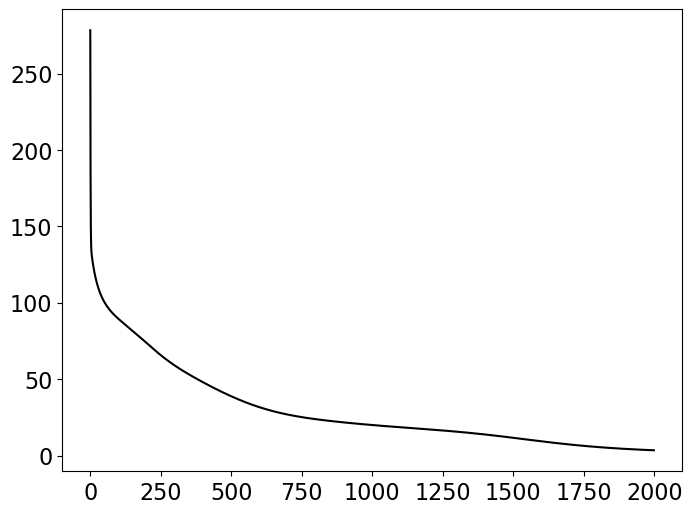

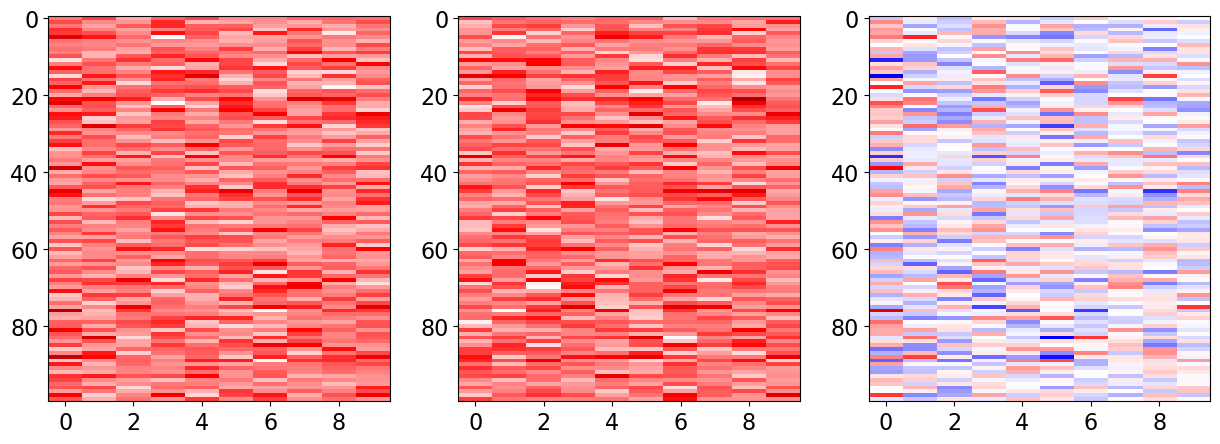

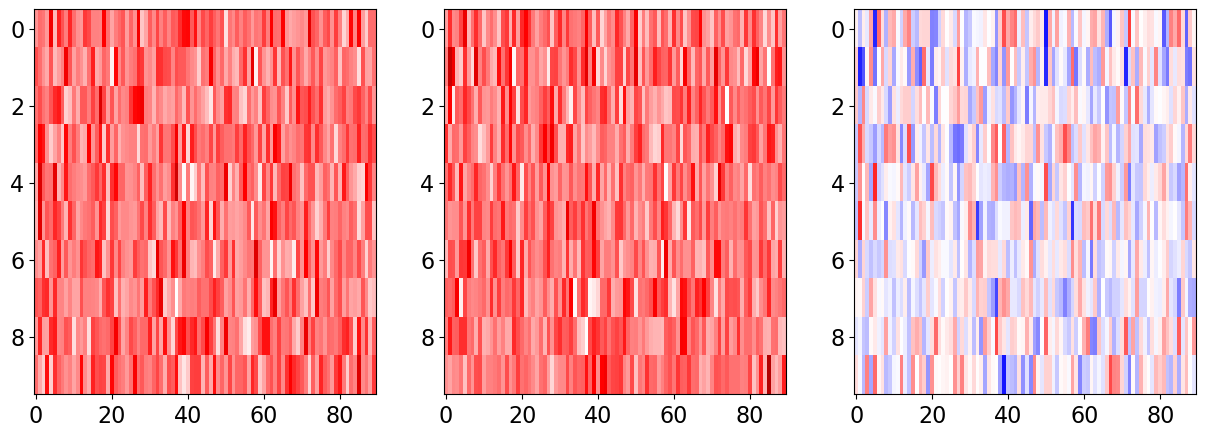

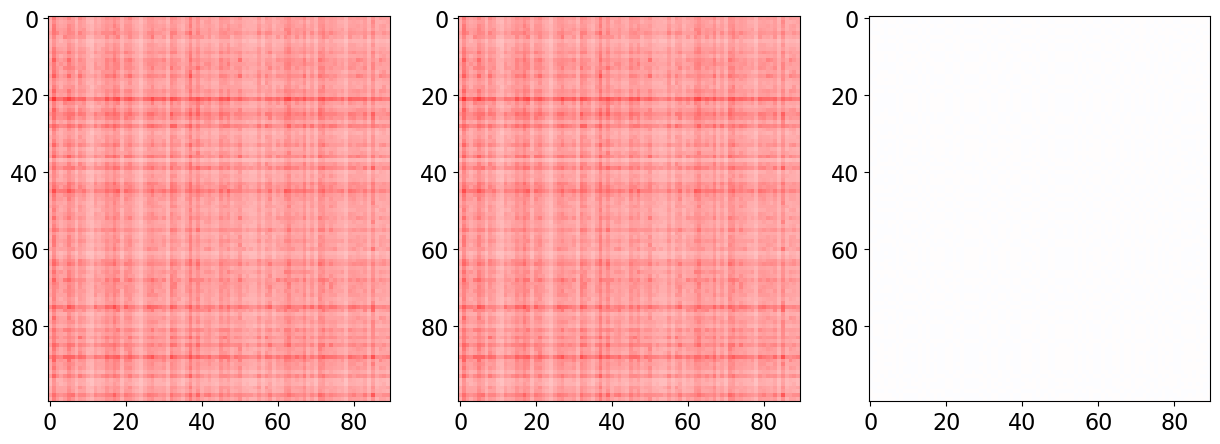

In [46]:
plt.figure()
plt.plot(reshist, 'k')

fig, axs = plt.subplots(1, 3,figsize=(15, 5))
axs[0].imshow(X, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[0].axis('tight')
axs[1].imshow(Xest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[1].axis('tight')
axs[2].imshow(X-Xest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[2].axis('tight')

fig, axs = plt.subplots(1, 3,figsize=(15, 5))
axs[0].imshow(Y, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[0].axis('tight')
axs[1].imshow(Yest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[1].axis('tight')
axs[2].imshow(Y-Yest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[2].axis('tight')

fig, axs = plt.subplots(1, 3,figsize=(15, 5))
axs[0].imshow(A, vmin=-100, vmax=100, interpolation='none', cmap='seismic')
axs[0].axis('tight')
axs[1].imshow(Xest @ Yest, vmin=-100, vmax=100, interpolation='none', cmap='seismic')
axs[1].axis('tight')
axs[2].imshow(A-Xest @ Yest, vmin=-100, vmax=100, interpolation='none', cmap='seismic')
axs[2].axis('tight');

## Non-negative, sparse matrix factorization

In [47]:
n, m, k = 100, 90, 10
X = np.maximum(np.random.normal(0, 1, (n, k)), 0) + 1.
Y = np.maximum(np.random.normal(0, 1, (k, m)), 0) + 1.
alpha, beta = 80, 80

X = prox0(X, alpha)
Y = prox0(Y, beta)

A = X @ Y

In [48]:
# First run to get PALM-consistent X and Y
X, Y, reshist = PALM(A, k, 5., 5., alpha, beta, niters=5000)
A = X @ Y

Xest, Yest, reshist = PALM(A, k, 5., 5., alpha, beta, niters=5000)

Iter:0, Res:276.467
Iter:100, Res:183.753
Iter:200, Res:173.653
Iter:300, Res:167.689
Iter:400, Res:159.337
Iter:500, Res:137.788
Iter:600, Res:129.035
Iter:700, Res:128.341
Iter:800, Res:126.544
Iter:900, Res:126.385
Iter:1000, Res:126.376
Iter:1100, Res:126.370
Iter:1200, Res:126.364
Iter:1300, Res:126.358
Iter:1400, Res:126.352
Iter:1500, Res:126.346
Iter:1600, Res:126.339
Iter:1700, Res:126.333
Iter:1800, Res:125.904
Iter:1900, Res:125.893
Iter:2000, Res:125.888
Iter:2100, Res:125.883
Iter:2200, Res:125.878
Iter:2300, Res:125.873
Iter:2400, Res:125.869
Iter:2500, Res:125.866
Iter:2600, Res:125.862
Iter:2700, Res:125.859
Iter:2800, Res:125.856
Iter:2900, Res:125.854
Iter:3000, Res:125.851
Iter:3100, Res:125.849
Iter:3200, Res:125.848
Iter:3300, Res:125.846
Iter:3400, Res:125.845
Iter:3500, Res:125.844
Iter:3600, Res:125.843
Iter:3700, Res:125.842
Iter:3800, Res:125.841
Iter:3900, Res:125.614
Iter:4000, Res:125.606
Iter:4100, Res:125.606
Iter:4200, Res:125.605
Iter:4300, Res:125.605


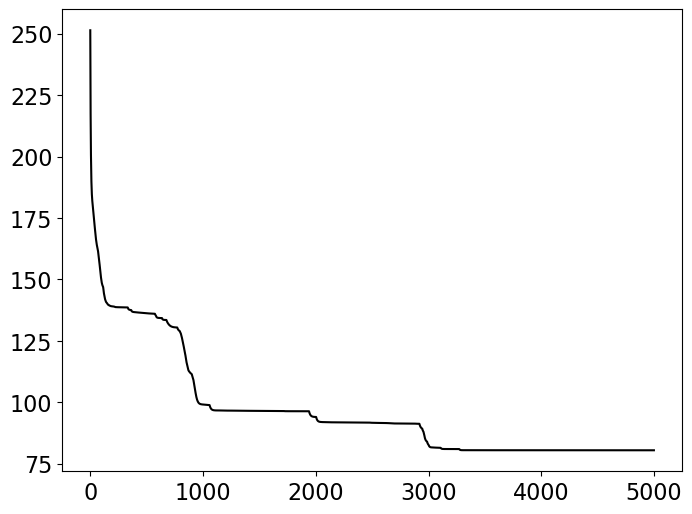

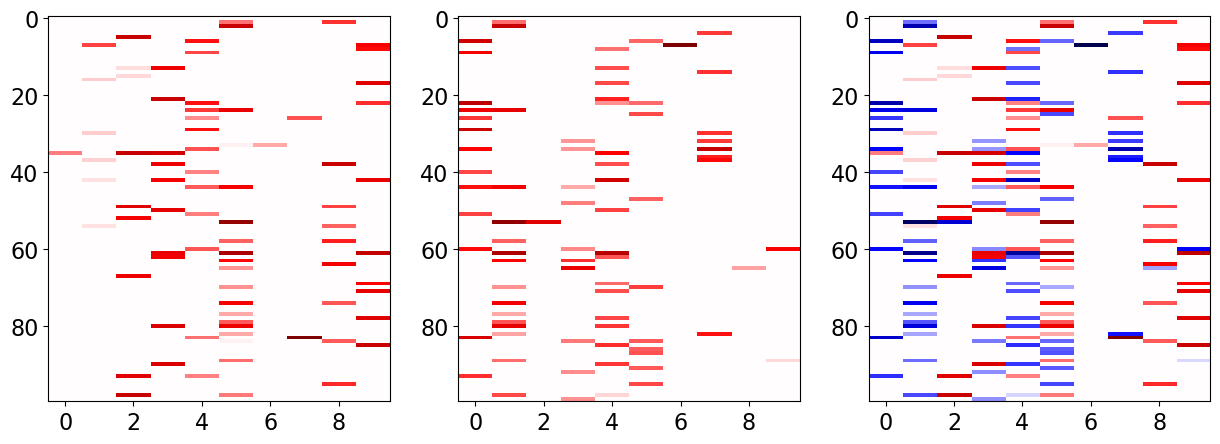

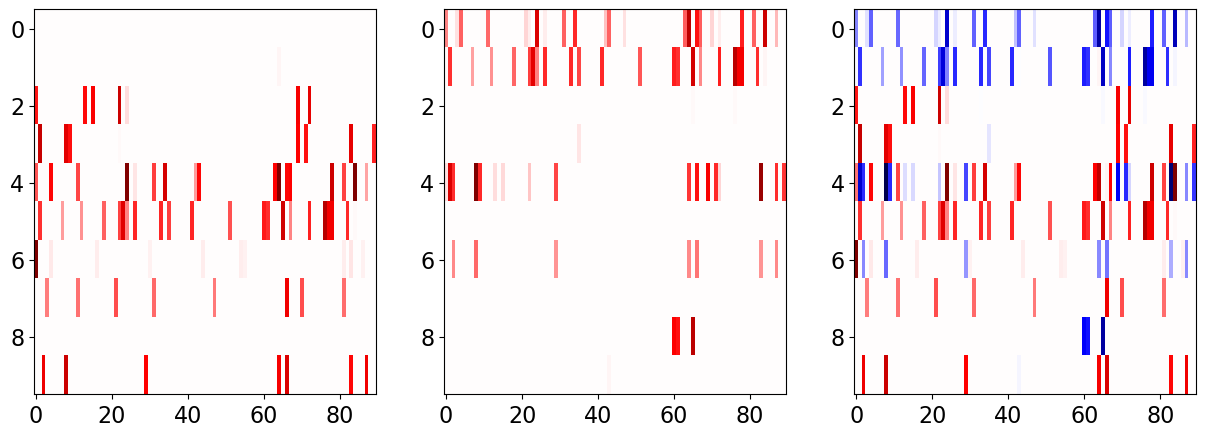

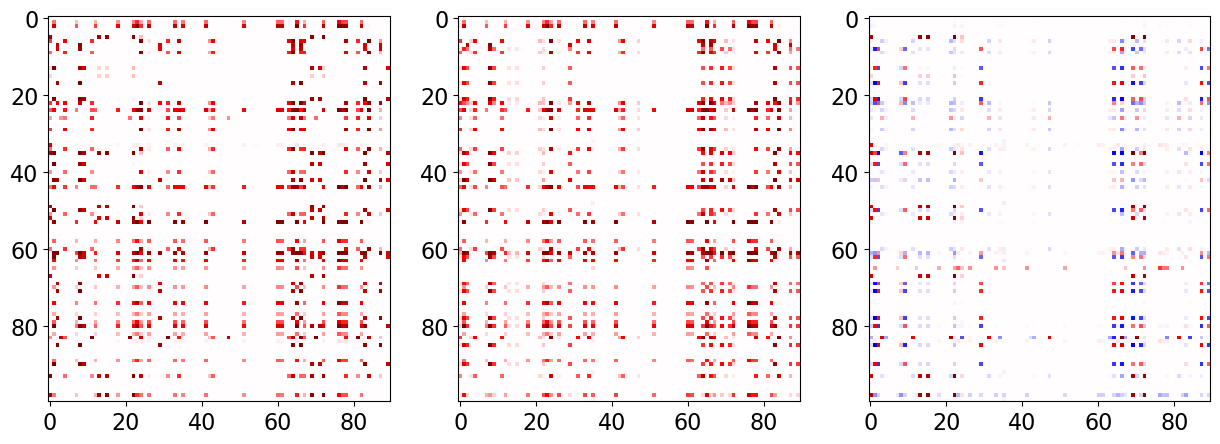

In [49]:
plt.figure()
plt.plot(reshist, 'k')

fig, axs = plt.subplots(1, 3,figsize=(15, 5))
axs[0].imshow(X, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[0].axis('tight')
axs[1].imshow(Xest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[1].axis('tight')
axs[2].imshow(X-Xest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[2].axis('tight')

fig, axs = plt.subplots(1, 3,figsize=(15, 5))
axs[0].imshow(Y, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[0].axis('tight')
axs[1].imshow(Yest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[1].axis('tight')
axs[2].imshow(Y-Yest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[2].axis('tight')

fig, axs = plt.subplots(1, 3,figsize=(15, 5))
axs[0].imshow(A, vmin=-10, vmax=10, interpolation='none', cmap='seismic')
axs[0].axis('tight')
axs[1].imshow(Xest @ Yest, vmin=-10, vmax=10, interpolation='none', cmap='seismic')
axs[1].axis('tight')
axs[2].imshow(A-Xest @ Yest, vmin=-10, vmax=10, interpolation='none', cmap='seismic')
axs[2].axis('tight');

## Non-negative matrix factorization (linear op.)

In [ ]:
class FactorizedSVD():
    r"""Factorized SVD operator.
    
    L2 norm of ||y-Op*X||_2^2 where a matrix X=U V^T
    """
    def __init__(self, U, V, y, Op=None, dtype='float64'):
        n, k = U.shape
        m = V.shape[1]
        
        self.U = U
        self.V = V
        self.y = y
        self.Op = Op
        self.shapeu = (n * m, n * k)
        self.shapev = (n * m, m * k)
        
    def updateU(self, U):
        self.U = U
    
    def updateV(self, V):
        self.V = V
    
    def _matvecU(self, u):
        U = u.reshape(n,k)
        X = U @ self.V
        if self.Op is not None:
            X = self.Op * X.ravel()
        return X.ravel()
    
    def _matvecV(self, v):
        V = v.reshape(k,m)
        X = self.U @ V
        if self.Op is not None:
            X = self.Op * X.ravel()
        return X.ravel()
    
    def matvec(self, x):
        if x.size == self.shapeu[1]:
            y = self._matvecU(x)
        else:
            y = self._matvecV(x)
        return y
        
    def gradU(self, u):
        r = self.y - self.matvec(u)
        if self.Op is not None:
            r = (self.Op.H @ r).reshape(n,m)
        else:
            r = r.reshape(n,m)
        g = -r @ self.V.T
        return g
    
    def gradV(self, v):
        r = self.y - self.matvec(v)
        if self.Op is not None:
            r = (self.Op.H @ r.ravel()).reshape(n,m)
        else:
            r = r.reshape(n,m)
        g = -self.U.T @ r 
        return g

In [51]:
n, m, k = 100, 90, 10
U = np.maximum(np.random.normal(0, 1, (n, k)), 0) + 1.
V = np.maximum(np.random.normal(0, 1, (k, m)), 0) + 1.

A = U @ V
A1 = A + np.random.normal(0,1,(n,m))

Fop = FactorizedSVD(U, V, A1.ravel())

np.allclose(Fop.gradU(U.ravel()), gradX(A1, U, V)), np.allclose(Fop.gradV(V.ravel()), gradY(A1, U, V))

(True, True)

In [52]:
def PALM1(H, n, m, k, gamma1, gamma2, alpha=None, beta=None, niters=4):
    U, V = H.U.copy(), H.V.copy()
    if alpha is not None:
        U = prox0(U, alpha)
    if beta is not None:
        V = prox0(V, beta)
    reshist = []
    for iiter in range(niters):
        ck = gamma1 * LY(V)
        X = U - (1/ck) * H.gradU(U.ravel())
        U = prox(X)
        H.updateU(U.copy())
        if alpha is not None:
            U = prox0(U, alpha)
        dk = gamma1 * LX(U)
        Y = V - (1/dk) * H.gradV(V.ravel())
        V = prox(Y)
        H.updateV(V.copy())
        if beta is not None:
            V = prox0(V, beta)
        resnorm = np.linalg.norm(A-U@V)
        reshist.append(resnorm)
        if iiter % 100 == 0:
            print('Iter:%d, Res:%.3f' %(iiter, resnorm))
    return X, Y, reshist

In [53]:
n, m, k = 100, 90, 10
X = np.maximum(np.random.normal(0, 1, (n, k)), 0) + 1.
Y = np.maximum(np.random.normal(0, 1, (k, m)), 0) + 1.

A = X @ Y

In [54]:
# First run to get PALM-consistent X and Y
Xin = np.maximum(np.random.normal(0, 1, (n, k)), 0) + 1.
Yin = np.maximum(np.random.normal(0, 1, (k, m)), 0) + 1.
Hop = FactorizedSVD(Xin, Yin, A.ravel())
X, Y, reshist = PALM1(Hop, n, m, k, 2, 2, niters=1000)
A = X @ Y

Xin = np.maximum(np.random.normal(0, 1, (n, k)), 0) + 1.
Yin = np.maximum(np.random.normal(0, 1, (k, m)), 0) + 1.
Hop = FactorizedSVD(Xin, Yin, A.ravel())
Xest, Yest, reshist = PALM1(Hop, n, m, k, 2, 2, niters=2000)

Iter:0, Res:277.441
Iter:100, Res:98.838
Iter:200, Res:79.896
Iter:300, Res:59.078
Iter:400, Res:42.913
Iter:500, Res:32.668
Iter:600, Res:24.857
Iter:700, Res:17.556
Iter:800, Res:11.155
Iter:900, Res:6.816
Iter:0, Res:275.371
Iter:100, Res:97.367
Iter:200, Res:78.200
Iter:300, Res:60.335
Iter:400, Res:47.550
Iter:500, Res:37.524
Iter:600, Res:28.957
Iter:700, Res:21.010
Iter:800, Res:13.750
Iter:900, Res:8.526
Iter:1000, Res:5.774
Iter:1100, Res:4.509
Iter:1200, Res:3.901
Iter:1300, Res:3.555
Iter:1400, Res:3.317
Iter:1500, Res:3.129
Iter:1600, Res:2.968
Iter:1700, Res:2.823
Iter:1800, Res:2.691
Iter:1900, Res:2.569


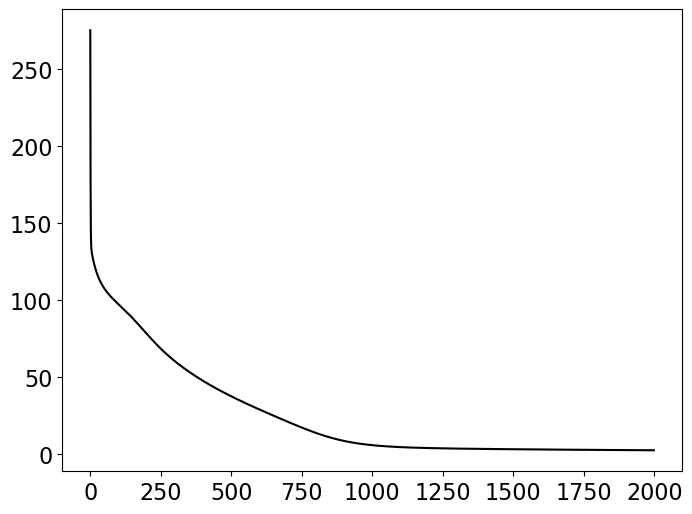

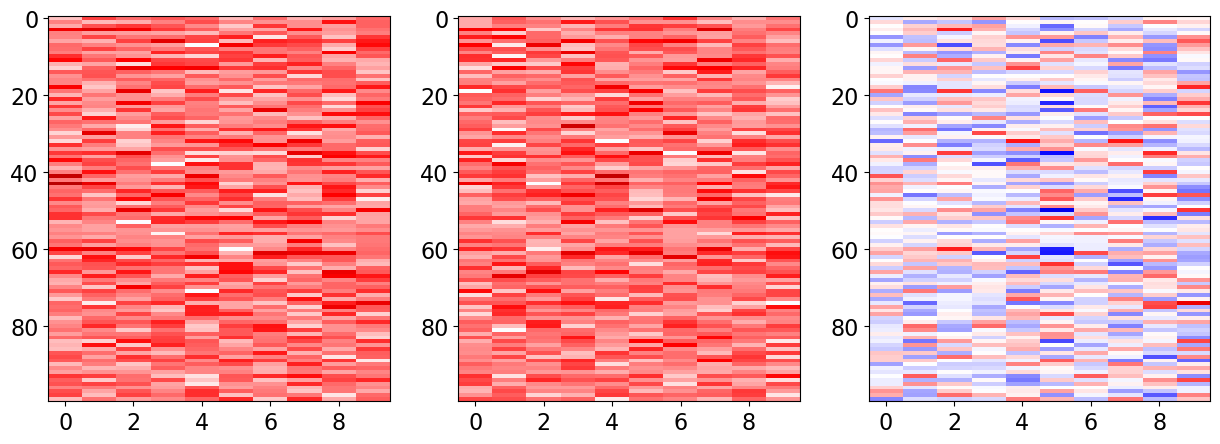

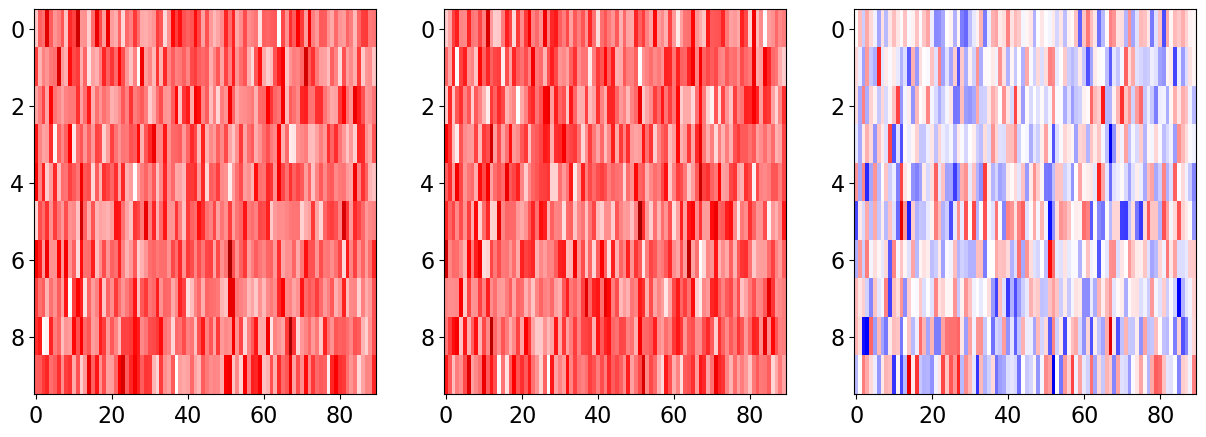

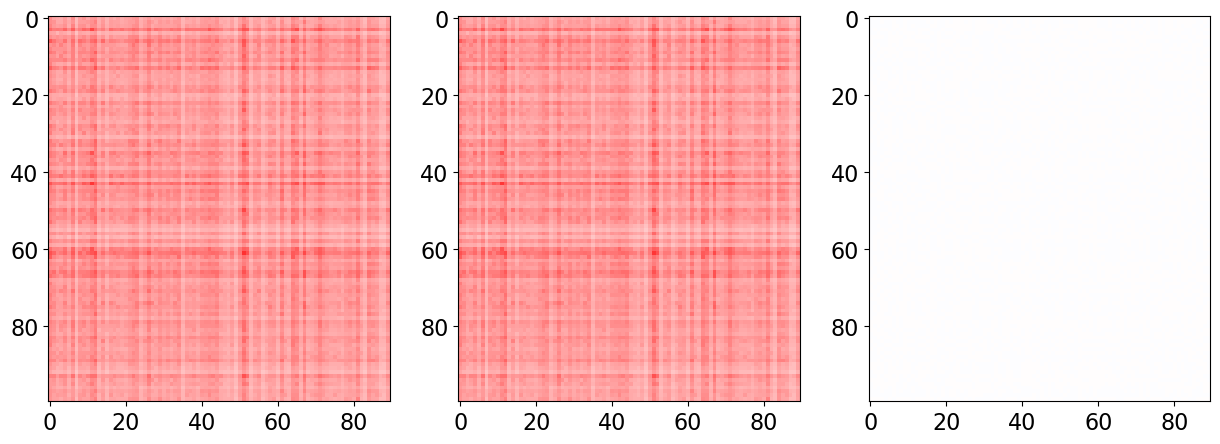

In [55]:
plt.figure()
plt.plot(reshist, 'k')

fig, axs = plt.subplots(1, 3,figsize=(15, 5))
axs[0].imshow(X, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[0].axis('tight')
axs[1].imshow(Xest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[1].axis('tight')
axs[2].imshow(X-Xest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[2].axis('tight')

fig, axs = plt.subplots(1, 3,figsize=(15, 5))
axs[0].imshow(Y, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[0].axis('tight')
axs[1].imshow(Yest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[1].axis('tight')
axs[2].imshow(Y-Yest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[2].axis('tight')

fig, axs = plt.subplots(1, 3,figsize=(15, 5))
axs[0].imshow(A, vmin=-100, vmax=100, interpolation='none', cmap='seismic')
axs[0].axis('tight')
axs[1].imshow(Xest @ Yest, vmin=-100, vmax=100, interpolation='none', cmap='seismic')
axs[1].axis('tight')
axs[2].imshow(A-Xest @ Yest, vmin=-100, vmax=100, interpolation='none', cmap='seismic')
axs[2].axis('tight');

## Non-negative matrix completion (linear op.)

In [56]:
n, m, k = 100, 90, 10
U = np.maximum(np.random.normal(0, 1, (n, k)), 0) + 1.
V = np.maximum(np.random.normal(0, 1, (k, m)), 0) + 1.

A = U @ V
A1 = A + np.random.normal(0,1,(n,m))

Rop = pylops.Restriction(n*m, np.random.permutation(np.arange(n*m))[:1000])
Fop = FactorizedSVD(U, V, Rop @ A1.ravel(), Op=Rop)

Fop.gradU(U.ravel());
Fop.gradV(V.ravel());

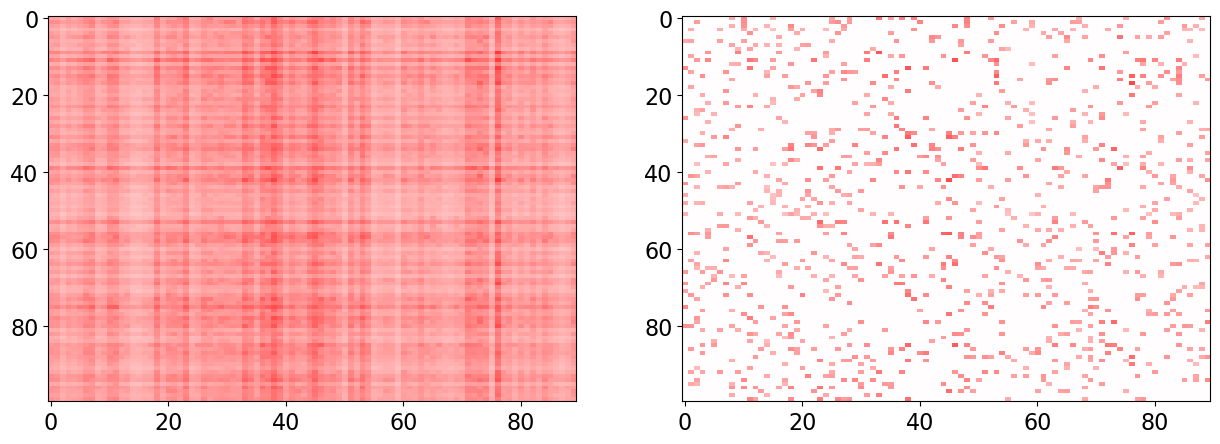

In [57]:
fig, axs = plt.subplots(1, 2,figsize=(15, 5))
axs[0].imshow(A, vmin=-100, vmax=100, interpolation='none', cmap='seismic')
axs[0].axis('tight')
axs[1].imshow((Rop.H*Rop*A.ravel()).reshape(n,m), vmin=-100, vmax=100, interpolation='none', cmap='seismic')
axs[1].axis('tight');

In [58]:
n, m, k = 100, 90, 10
X = np.maximum(np.random.normal(0, 1, (n, k)), 0) + 1.
Y = np.maximum(np.random.normal(0, 1, (k, m)), 0) + 1.

A = X @ Y

In [59]:
# First run to get PALM-consistent X and Y
Xin = np.maximum(np.random.normal(0, 1, (n, k)), 0) + 1.
Yin = np.maximum(np.random.normal(0, 1, (k, m)), 0) + 1.
Hop = FactorizedSVD(Xin, Yin, Rop @ A.ravel(), Op=Rop)
X, Y, reshist = PALM1(Hop, n, m, k, 2, 2, niters=1000)
A = X @ Y

Xin = np.maximum(np.random.normal(0, 1, (n, k)), 0) + 1.
Yin = np.maximum(np.random.normal(0, 1, (k, m)), 0) + 1.
Hop = FactorizedSVD(Xin, Yin, Rop @ A.ravel(), Op=Rop)
Xest, Yest, reshist = PALM1(Hop, n, m, k, 2, 2, niters=2000)

Iter:0, Res:465.824
Iter:100, Res:149.329
Iter:200, Res:142.339
Iter:300, Res:139.373
Iter:400, Res:137.953
Iter:500, Res:137.325
Iter:600, Res:137.147
Iter:700, Res:137.235
Iter:800, Res:137.483
Iter:900, Res:137.822
Iter:0, Res:505.275
Iter:100, Res:137.594
Iter:200, Res:130.994
Iter:300, Res:128.408
Iter:400, Res:126.987
Iter:500, Res:126.196
Iter:600, Res:125.794
Iter:700, Res:125.642
Iter:800, Res:125.650
Iter:900, Res:125.763
Iter:1000, Res:125.942
Iter:1100, Res:126.162
Iter:1200, Res:126.407
Iter:1300, Res:126.662
Iter:1400, Res:126.922
Iter:1500, Res:127.178
Iter:1600, Res:127.427
Iter:1700, Res:127.668
Iter:1800, Res:127.897
Iter:1900, Res:128.115


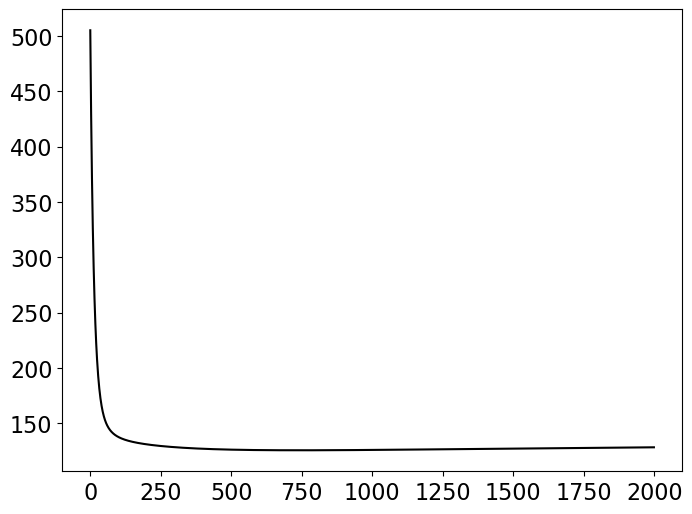

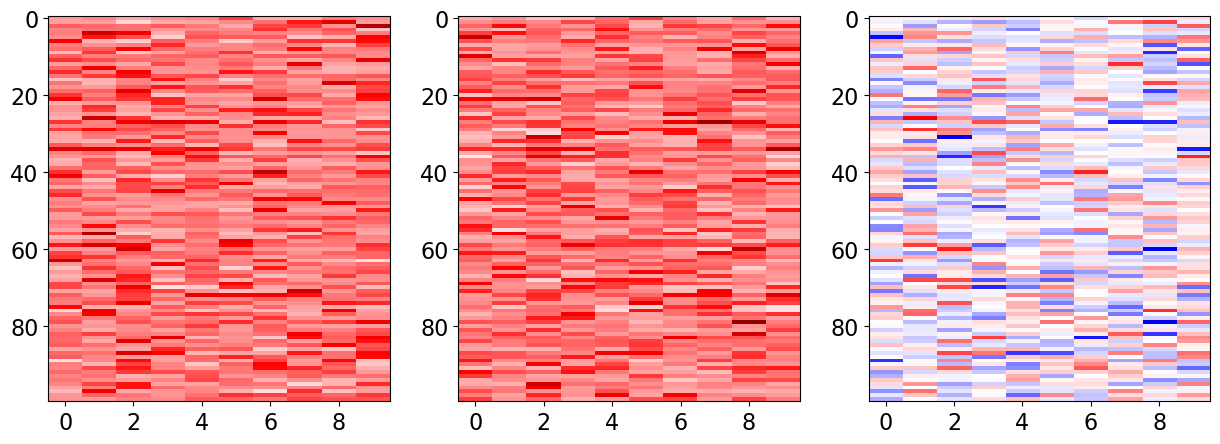

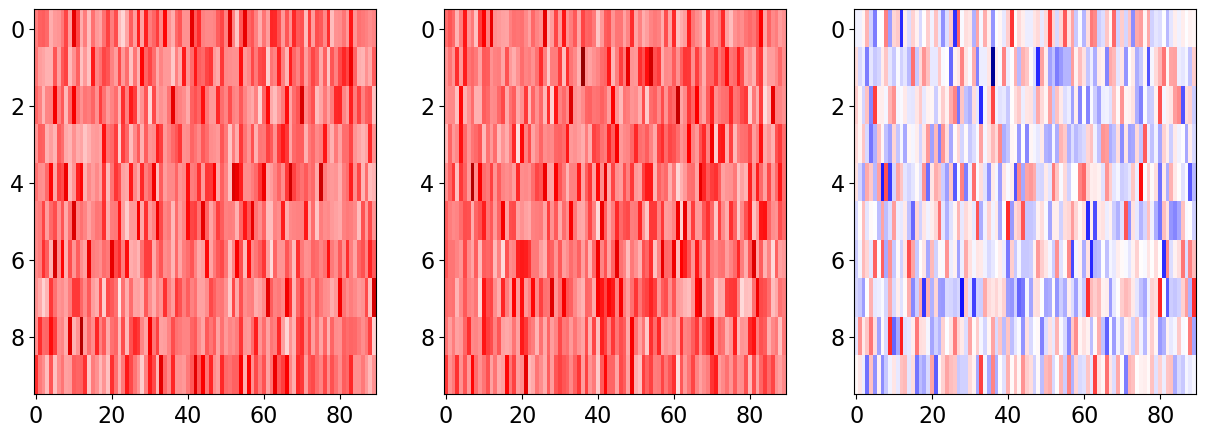

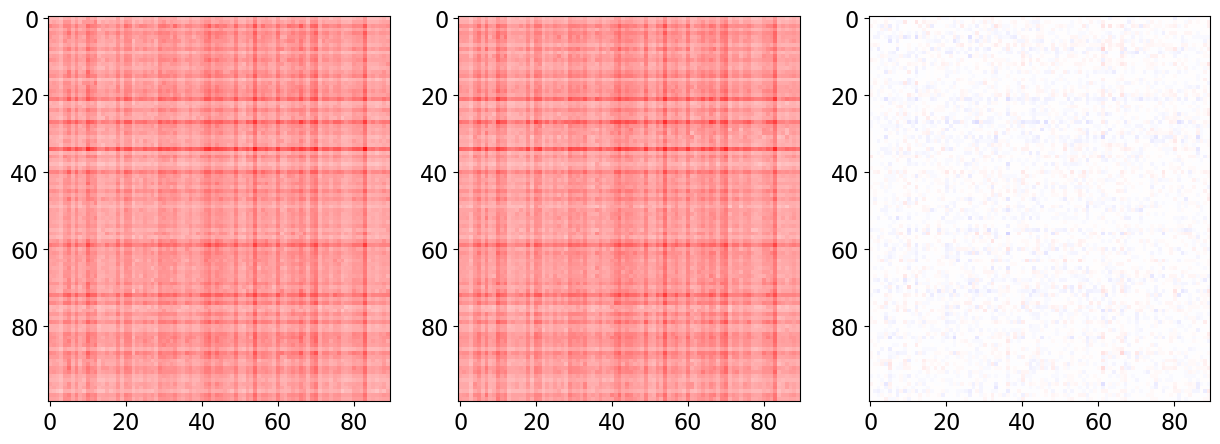

In [60]:
plt.figure()
plt.plot(reshist, 'k')

fig, axs = plt.subplots(1, 3,figsize=(15, 5))
axs[0].imshow(X, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[0].axis('tight')
axs[1].imshow(Xest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[1].axis('tight')
axs[2].imshow(X-Xest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[2].axis('tight')

fig, axs = plt.subplots(1, 3,figsize=(15, 5))
axs[0].imshow(Y, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[0].axis('tight')
axs[1].imshow(Yest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[1].axis('tight')
axs[2].imshow(Y-Yest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[2].axis('tight')

fig, axs = plt.subplots(1, 3,figsize=(15, 5))
axs[0].imshow(A, vmin=-100, vmax=100, interpolation='none', cmap='seismic')
axs[0].axis('tight')
axs[1].imshow(Xest @ Yest, vmin=-100, vmax=100, interpolation='none', cmap='seismic')
axs[1].axis('tight')
axs[2].imshow(A-Xest @ Yest, vmin=-100, vmax=100, interpolation='none', cmap='seismic')
axs[2].axis('tight');